In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

# a. Load the Titanic dataset
titanic_url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_df = pd.read_csv(titanic_url)

# Display the first few rows of the dataset
print("Original Titanic Dataset:")
print(titanic_df.head())

# b. Identify and handle missing values
# Handling missing values in 'Age', 'Fare', 'Embarked'
imputer = SimpleImputer(strategy='mean')
titanic_df[['Age', 'Fare']] = imputer.fit_transform(titanic_df[['Age', 'Fare']])
# titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# c. Create new features
titanic_df['FamilySize'] = titanic_df['Siblings/Spouses Aboard'] + titanic_df['Parents/Children Aboard']

# d. Encode categorical variables
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])

# One-hot encode 'Embarked'
# titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], prefix='Embarked')

# e. Check and remove duplicate rows
titanic_df.drop_duplicates(inplace=True)

# f. Detect outliers using Z-Score
z_scores = zscore(titanic_df[['Age', 'Fare']])
outliers_zscore = (abs(z_scores) > 3).all(axis=1)
titanic_df_zscore = titanic_df[~outliers_zscore]

# Detect outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
outliers_iso = iso_forest.fit_predict(titanic_df[['Age', 'Fare']])
titanic_df_iso = titanic_df[outliers_iso != -1]

# Display results
print("\nAfter Data Pre-processing:")
print(titanic_df.head())
print("\nOutliers Detected by Z-Score:")
print(titanic_df_zscore.head())
print("\nOutliers Detected by Isolation Forest:")
print(titanic_df_iso.head())


Original Titanic Dataset:
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  

After Data Pre-processing:
   Survived  Pclass                    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


170498071/170498071 [==============================] - 3s 0us/step


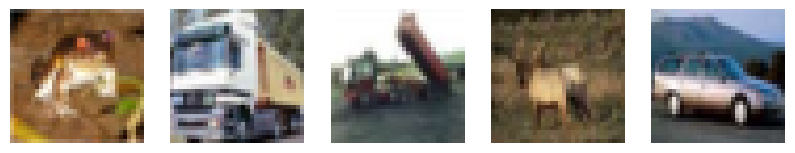

Image dimensions: (32, 32, 3)
Number of classes: 10
Epoch 1/10
1563/1563 - 11s - loss: 1.9092 - accuracy: 0.3135 - val_loss: 1.7686 - val_accuracy: 0.3761 - 11s/epoch - 7ms/step
Epoch 2/10
1563/1563 - 12s - loss: 1.7073 - accuracy: 0.3926 - val_loss: 1.6955 - val_accuracy: 0.3921 - 12s/epoch - 8ms/step
Epoch 3/10
1563/1563 - 10s - loss: 1.6265 - accuracy: 0.4204 - val_loss: 1.6136 - val_accuracy: 0.4235 - 10s/epoch - 6ms/step
Epoch 4/10
1563/1563 - 12s - loss: 1.5707 - accuracy: 0.4419 - val_loss: 1.9316 - val_accuracy: 0.3471 - 12s/epoch - 8ms/step
Epoch 5/10
1563/1563 - 11s - loss: 1.5248 - accuracy: 0.4572 - val_loss: 1.5158 - val_accuracy: 0.4561 - 11s/epoch - 7ms/step
Epoch 6/10
1563/1563 - 9s - loss: 1.4862 - accuracy: 0.4729 - val_loss: 1.4931 - val_accuracy: 0.4668 - 9s/epoch - 6ms/step
Epoch 7/10
1563/1563 - 10s - loss: 1.4518 - accuracy: 0.4831 - val_loss: 1.4603 - val_accuracy: 0.4873 - 10s/epoch - 7ms/step
Epoch 8/10
1563/1563 - 10s - loss: 1.4235 - accuracy: 0.4952 - val_l

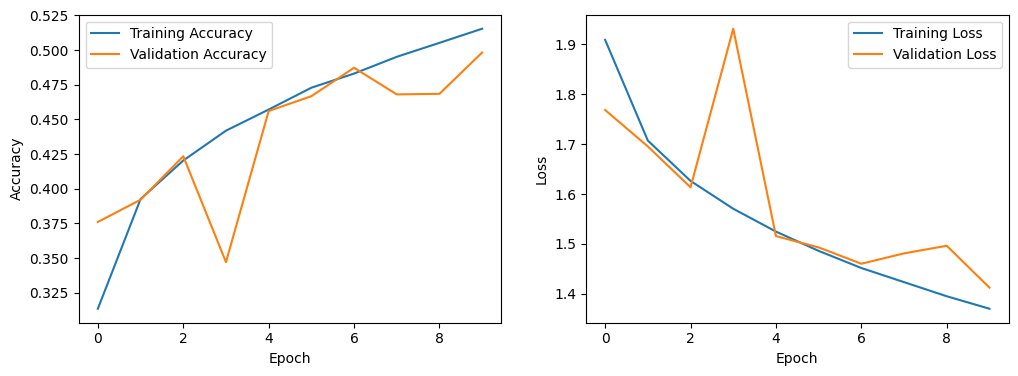

313/313 - 1s - loss: 1.4125 - accuracy: 0.4983 - 819ms/epoch - 3ms/step

Test Accuracy with sgd optimizer and categorical_crossentropy loss: 49.83%

Epoch 1/10
1563/1563 - 11s - loss: 0.0584 - accuracy: 0.5505 - val_loss: 0.0614 - val_accuracy: 0.5191 - 11s/epoch - 7ms/step
Epoch 2/10
1563/1563 - 9s - loss: 0.0578 - accuracy: 0.5566 - val_loss: 0.0612 - val_accuracy: 0.5235 - 9s/epoch - 6ms/step
Epoch 3/10
1563/1563 - 10s - loss: 0.0575 - accuracy: 0.5589 - val_loss: 0.0611 - val_accuracy: 0.5246 - 10s/epoch - 6ms/step
Epoch 4/10
1563/1563 - 10s - loss: 0.0574 - accuracy: 0.5602 - val_loss: 0.0611 - val_accuracy: 0.5234 - 10s/epoch - 6ms/step
Epoch 5/10
1563/1563 - 10s - loss: 0.0572 - accuracy: 0.5611 - val_loss: 0.0610 - val_accuracy: 0.5234 - 10s/epoch - 6ms/step
Epoch 6/10
1563/1563 - 9s - loss: 0.0571 - accuracy: 0.5634 - val_loss: 0.0610 - val_accuracy: 0.5231 - 9s/epoch - 6ms/step
Epoch 7/10
1563/1563 - 10s - loss: 0.0570 - accuracy: 0.5633 - val_loss: 0.0610 - val_accuracy: 0.5

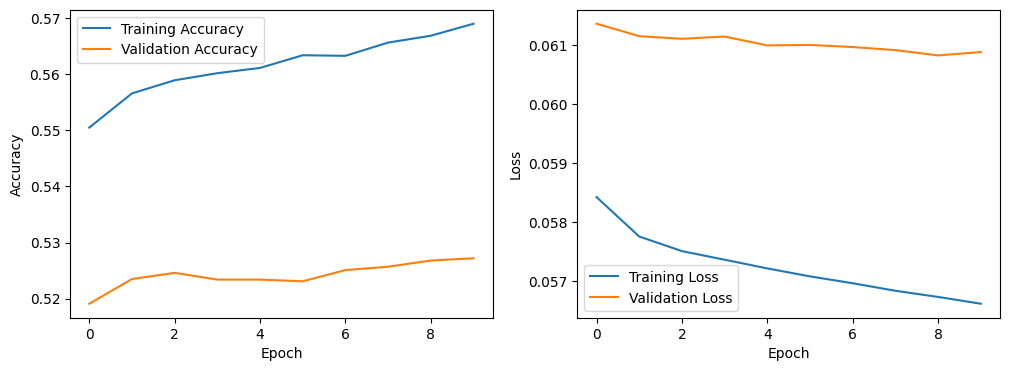

313/313 - 1s - loss: 0.0609 - accuracy: 0.5272 - 850ms/epoch - 3ms/step

Test Accuracy with sgd optimizer and mean_squared_error loss: 52.72%

Epoch 1/10
1563/1563 - 18s - loss: 1.8111 - accuracy: 0.3464 - val_loss: 1.6673 - val_accuracy: 0.3933 - 18s/epoch - 11ms/step
Epoch 2/10
1563/1563 - 17s - loss: 1.6315 - accuracy: 0.4137 - val_loss: 1.5809 - val_accuracy: 0.4378 - 17s/epoch - 11ms/step
Epoch 3/10
1563/1563 - 16s - loss: 1.5643 - accuracy: 0.4387 - val_loss: 1.5256 - val_accuracy: 0.4517 - 16s/epoch - 11ms/step
Epoch 4/10
1563/1563 - 16s - loss: 1.5205 - accuracy: 0.4563 - val_loss: 1.5328 - val_accuracy: 0.4539 - 16s/epoch - 10ms/step
Epoch 5/10
1563/1563 - 16s - loss: 1.4863 - accuracy: 0.4680 - val_loss: 1.5735 - val_accuracy: 0.4396 - 16s/epoch - 10ms/step
Epoch 6/10
1563/1563 - 17s - loss: 1.4573 - accuracy: 0.4791 - val_loss: 1.4923 - val_accuracy: 0.4686 - 17s/epoch - 11ms/step
Epoch 7/10
1563/1563 - 17s - loss: 1.4351 - accuracy: 0.4889 - val_loss: 1.4737 - val_accuracy:

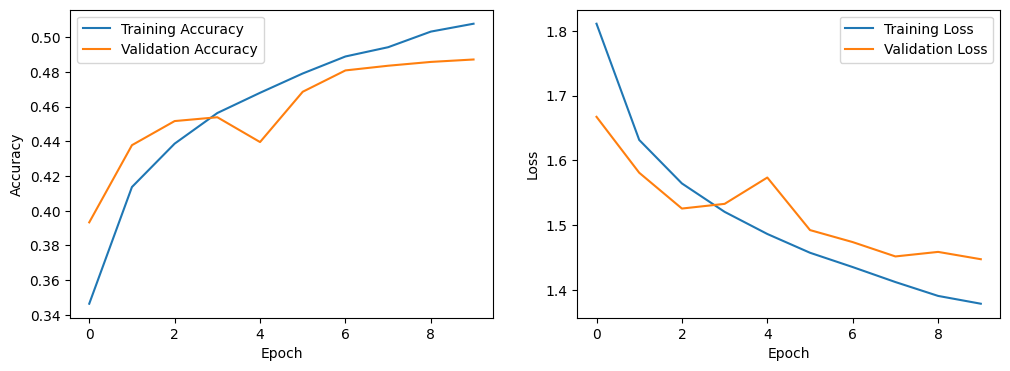

313/313 - 1s - loss: 1.4473 - accuracy: 0.4872 - 875ms/epoch - 3ms/step

Test Accuracy with adam optimizer and categorical_crossentropy loss: 48.72%

Epoch 1/10
1563/1563 - 18s - loss: 0.0631 - accuracy: 0.5030 - val_loss: 0.0657 - val_accuracy: 0.4731 - 18s/epoch - 12ms/step
Epoch 2/10
1563/1563 - 18s - loss: 0.0626 - accuracy: 0.5094 - val_loss: 0.0686 - val_accuracy: 0.4520 - 18s/epoch - 11ms/step
Epoch 3/10
1563/1563 - 17s - loss: 0.0619 - accuracy: 0.5154 - val_loss: 0.0647 - val_accuracy: 0.4876 - 17s/epoch - 11ms/step
Epoch 4/10
1563/1563 - 17s - loss: 0.0613 - accuracy: 0.5217 - val_loss: 0.0665 - val_accuracy: 0.4714 - 17s/epoch - 11ms/step
Epoch 5/10
1563/1563 - 19s - loss: 0.0607 - accuracy: 0.5305 - val_loss: 0.0649 - val_accuracy: 0.4878 - 19s/epoch - 12ms/step
Epoch 6/10
1563/1563 - 17s - loss: 0.0606 - accuracy: 0.5292 - val_loss: 0.0663 - val_accuracy: 0.4734 - 17s/epoch - 11ms/step
Epoch 7/10
1563/1563 - 16s - loss: 0.0599 - accuracy: 0.5352 - val_loss: 0.0650 - val_ac

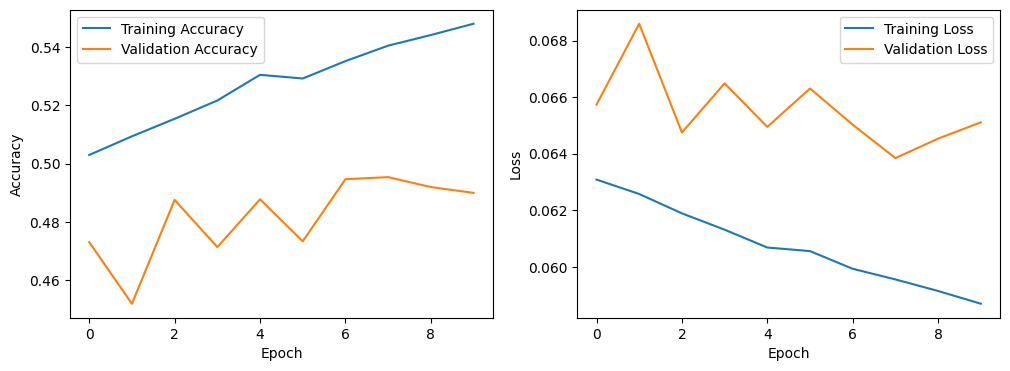

313/313 - 1s - loss: 0.0651 - accuracy: 0.4900 - 859ms/epoch - 3ms/step

Test Accuracy with adam optimizer and mean_squared_error loss: 49.00%



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# a. Load the CIFAR-10 dataset and display a few sample images
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Display a few sample images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.show()

# b. Display dimensions of images and number of classes
print(f"Image dimensions: {train_images.shape[1:]}")
num_classes = len(set(train_labels.flatten()))
print(f"Number of classes: {num_classes}")

# c. Data preprocessing
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# d. Implement the architecture of a Feedforward Neural Network with three hidden layers
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# e. Compile, Train, and Evaluate the model with different optimizers and loss functions
optimizers = ['sgd', 'adam']
loss_functions = ['categorical_crossentropy', 'mean_squared_error']

for optimizer in optimizers:
    for loss_function in loss_functions:
        model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
        history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)

        # Plot training history
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

        # Evaluate the model on the test set
        test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
        print(f"\nTest Accuracy with {optimizer} optimizer and {loss_function} loss: {test_accuracy * 100:.2f}%\n")


In [ ]:
from tensorflow.keras.optimizers import SGD
learning_rate = 0.01
momentum = 0.9
sgd_optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

Epoch 1/10
1563/1563 - 11s - loss: 1.9020 - accuracy: 0.3152 - val_loss: 1.8116 - val_accuracy: 0.3403 - 11s/epoch - 7ms/step
Epoch 2/10
1563/1563 - 10s - loss: 1.7079 - accuracy: 0.3896 - val_loss: 1.6738 - val_accuracy: 0.4011 - 10s/epoch - 7ms/step
Epoch 3/10
1563/1563 - 11s - loss: 1.6219 - accuracy: 0.4225 - val_loss: 1.7409 - val_accuracy: 0.3745 - 11s/epoch - 7ms/step
Epoch 4/10
1563/1563 - 13s - loss: 1.5598 - accuracy: 0.4470 - val_loss: 1.6105 - val_accuracy: 0.4271 - 13s/epoch - 8ms/step
Epoch 5/10
1563/1563 - 10s - loss: 1.5125 - accuracy: 0.4595 - val_loss: 1.5320 - val_accuracy: 0.4471 - 10s/epoch - 6ms/step
Epoch 6/10
1563/1563 - 11s - loss: 1.4752 - accuracy: 0.4738 - val_loss: 1.5701 - val_accuracy: 0.4367 - 11s/epoch - 7ms/step
Epoch 7/10
1563/1563 - 11s - loss: 1.4452 - accuracy: 0.4859 - val_loss: 1.5215 - val_accuracy: 0.4597 - 11s/epoch - 7ms/step
Epoch 8/10
1563/1563 - 10s - loss: 1.4136 - accuracy: 0.4975 - val_loss: 1.5343 - val_accuracy: 0.4602 - 10s/epoch - 7

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
1563/1563 - 10s - loss: 1.8937 - accuracy: 0.3188 - val_loss: 1.7255 - val_accuracy: 0.3846 - 10s/epoch - 7ms/step
Epoch 2/10
1563/1563 - 10s - loss: 1.7055 - accuracy: 0.3882 - val_loss: 1.6815 - val_accuracy: 0.3987 - 10s/epoch - 6ms/step
Epoch 3/10
1563/1563 - 10s - loss: 1.6257 - accuracy: 0.4203 - val_loss: 1.6936 - val_accuracy: 0.3790 - 10s/epoch - 7ms/step
Epoch 4/10
1563/1563 - 14s - loss: 1.5684 - accuracy: 0.4406 - val_loss: 1.5366 - val_accuracy: 0.4519 - 14s/epoch - 9ms/step
Epoch 5/10
1563/1563 - 9s - loss: 1.5208 - accuracy: 0.4589 - val_loss: 1.5313 - val_accuracy: 0.4464 - 9s/epoch - 6ms/step
Epoch 6/10
1563/1563 - 9s - loss: 1.4828 - accuracy: 0.4708 - val_loss: 1.5417 - val_accuracy: 0.4427 - 9s/epoch - 6ms/step
Epoch 7/10
1563/1563 - 11s - loss: 1.4506 - accuracy: 0.4847 - val_loss: 1.5052 - val_accuracy: 0.4567 - 11s/epoch - 7ms/step
Epoch 8/10
1563/1563 - 10s - loss: 1.4242 - accuracy: 0.4920 - val_loss: 1.5087 - val_accuracy: 0.4676 - 10s/epoch - 7ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
1563/1563 - 12s - loss: 1.8833 - accuracy: 0.3207 - val_loss: 1.7309 - val_accuracy: 0.3860 - 12s/epoch - 8ms/step
Epoch 2/10
1563/1563 - 10s - loss: 1.6932 - accuracy: 0.3958 - val_loss: 1.6795 - val_accuracy: 0.4098 - 10s/epoch - 6ms/step
Epoch 3/10
1563/1563 - 11s - loss: 1.6079 - accuracy: 0.4263 - val_loss: 1.6149 - val_accuracy: 0.4187 - 11s/epoch - 7ms/step
Epoch 4/10
1563/1563 - 10s - loss: 1.5509 - accuracy: 0.4474 - val_loss: 1.5212 - val_accuracy: 0.4556 - 10s/epoch - 7ms/step
Epoch 5/10
1563/1563 - 10s - loss: 1.5071 - accuracy: 0.4623 - val_loss: 1.5395 - val_accuracy: 0.4495 - 10s/epoch - 7ms/step
Epoch 6/10
1563/1563 - 11s - loss: 1.4670 - accuracy: 0.4793 - val_loss: 1.5406 - val_accuracy: 0.4533 - 11s/epoch - 7ms/step
Epoch 7/10
1563/1563 - 9s - loss: 1.4382 - accuracy: 0.4880 - val_loss: 1.5176 - val_accuracy: 0.4550 - 9s/epoch - 6ms/step
Epoch 8/10
1563/1563 - 10s - loss: 1.4084 - accuracy: 0.4978 - val_loss: 1.4554 - val_accuracy: 0.4797 - 10s/epoch - 6ms

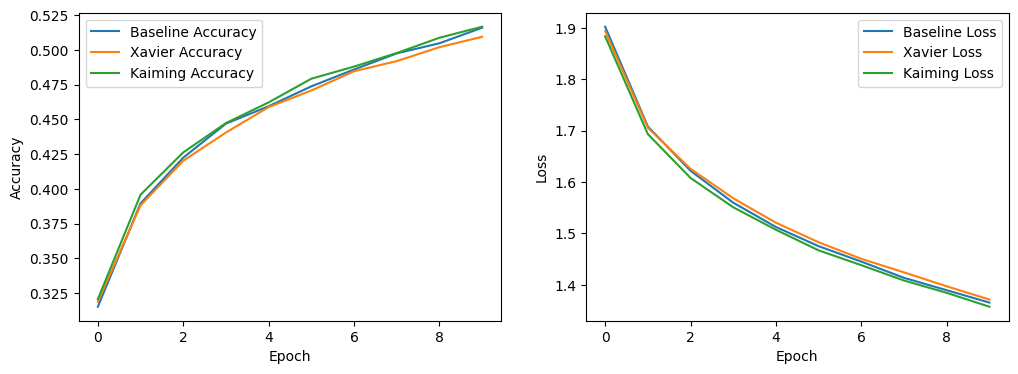

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import GlorotNormal, HeNormal
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset and preprocess the data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Define a function to create the model
def create_model(initializer):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(256, activation='relu', kernel_initializer=initializer))
    model.add(Dense(128, activation='relu', kernel_initializer=initializer))
    model.add(Dense(64, activation='relu', kernel_initializer=initializer))
    model.add(Dense(10, activation='softmax'))
    return model

# Baseline model with default weight initialization
baseline_model = create_model(initializer='glorot_uniform')
baseline_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the baseline model
baseline_history = baseline_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)

# Function to create and train a model with a specified weight initializer
def train_model(initializer):
    model = create_model(initializer)
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)
    return history

# Xavier initialization
xavier_initializer = GlorotNormal()
xavier_history = train_model(initializer=xavier_initializer)

# Kaiming initialization (He Normal)
kaiming_initializer = HeNormal()
kaiming_history = train_model(initializer=kaiming_initializer)

# Plot training history for comparison
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['accuracy'], label='Baseline Accuracy')
plt.plot(xavier_history.history['accuracy'], label='Xavier Accuracy')
plt.plot(kaiming_history.history['accuracy'], label='Kaiming Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['loss'], label='Baseline Loss')
plt.plot(xavier_history.history['loss'], label='Xavier Loss')
plt.plot(kaiming_history.history['loss'], label='Kaiming Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
1563/1563 - 11s - loss: 1.9044 - accuracy: 0.3121 - val_loss: 1.8039 - val_accuracy: 0.3638 - 11s/epoch - 7ms/step
Epoch 2/10
1563/1563 - 10s - loss: 1.7144 - accuracy: 0.3840 - val_loss: 1.6821 - val_accuracy: 0.4148 - 10s/epoch - 7ms/step
Epoch 3/10
1563/1563 - 9s - loss: 1.6317 - accuracy: 0.4175 - val_loss: 1.7336 - val_accuracy: 0.3803 - 9s/epoch - 6ms/step
Epoch 4/10
1563/1563 - 10s - loss: 1.5719 - accuracy: 0.4418 - val_loss: 1.6492 - val_accuracy: 0.4196 - 10s/epoch - 7ms/step
Epoch 5/10
1563/1563 - 10s - loss: 1.5251 - accuracy: 0.4560 - val_loss: 1.5819 - val_accuracy: 0.4328 - 10s/epoch - 7ms/step
Epoch 6/10
1563/1563 - 10s - loss: 1.4870 - accuracy: 0.4681 - val_loss: 1.5089 - val_accuracy: 0.4651 - 10s/epoch - 7ms/step
Epoch 7/10
1563/1563 - 9s - loss: 1.4536 - accuracy: 0.4811 - val_loss: 1.5362 - val_accuracy: 0.4475 - 9s/epoch - 6ms/step
Epoch 8/10
1563/1563 - 10s - loss: 1.4251 - accuracy: 0.4907 - val_loss: 1.5065 - val_accuracy: 0.4578 - 10s/epoch - 7ms/s

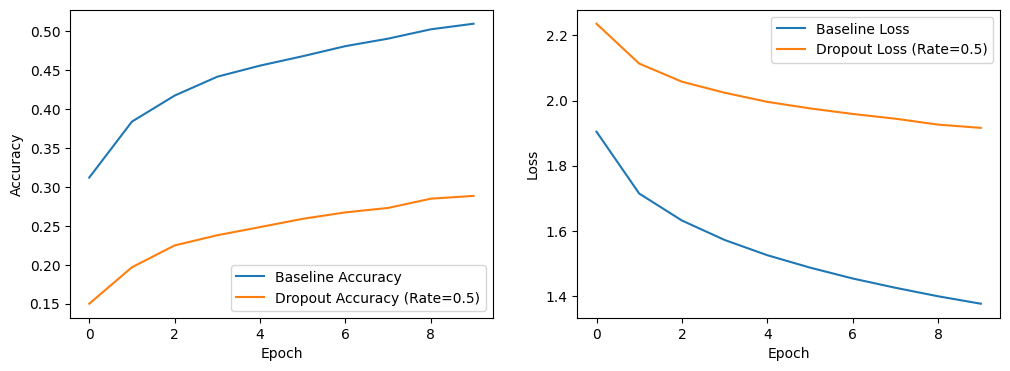

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset and preprocess the data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Define a function to create the baseline model
def create_baseline_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Define a function to create the model with dropout
def create_dropout_model(dropout_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    return model

# Create baseline model
baseline_model = create_baseline_model()
baseline_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the baseline model
baseline_history = baseline_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)

# Function to create and train a model with dropout
def train_dropout_model(dropout_rate):
    model = create_dropout_model(dropout_rate)
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)
    return history

# Dropout with rate of 0.5 (you can adjust this rate)
dropout_rate = 0.5
dropout_history = train_dropout_model(dropout_rate)

# Plot training history for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['accuracy'], label='Baseline Accuracy')
plt.plot(dropout_history.history['accuracy'], label=f'Dropout Accuracy (Rate={dropout_rate})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['loss'], label='Baseline Loss')
plt.plot(dropout_history.history['loss'], label=f'Dropout Loss (Rate={dropout_rate})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
1563/1563 - 11s - loss: 1.8978 - accuracy: 0.3133 - val_loss: 1.7774 - val_accuracy: 0.3724 - 11s/epoch - 7ms/step
Epoch 2/10
1563/1563 - 10s - loss: 1.7037 - accuracy: 0.3912 - val_loss: 1.6552 - val_accuracy: 0.4062 - 10s/epoch - 6ms/step
Epoch 3/10
1563/1563 - 10s - loss: 1.6178 - accuracy: 0.4235 - val_loss: 1.6334 - val_accuracy: 0.4177 - 10s/epoch - 6ms/step
Epoch 4/10
1563/1563 - 9s - loss: 1.5601 - accuracy: 0.4449 - val_loss: 1.6119 - val_accuracy: 0.4332 - 9s/epoch - 6ms/step
Epoch 5/10
1563/1563 - 9s - loss: 1.5157 - accuracy: 0.4619 - val_loss: 1.5418 - val_accuracy: 0.4485 - 9s/epoch - 6ms/step
Epoch 6/10
1563/1563 - 10s - loss: 1.4749 - accuracy: 0.4735 - val_loss: 1.4816 - val_accuracy: 0.4735 - 10s/epoch - 6ms/step
Epoch 7/10
1563/1563 - 10s - loss: 1.4429 - accuracy: 0.4852 - val_loss: 1.4571 - val_accuracy: 0.4773 - 10s/epoch - 6ms/step
Epoch 8/10
1563/1563 - 9s - loss: 1.4139 - accuracy: 0.4948 - val_loss: 1.4419 - val_accuracy: 0.4851 - 9s/epoch - 6ms/ste

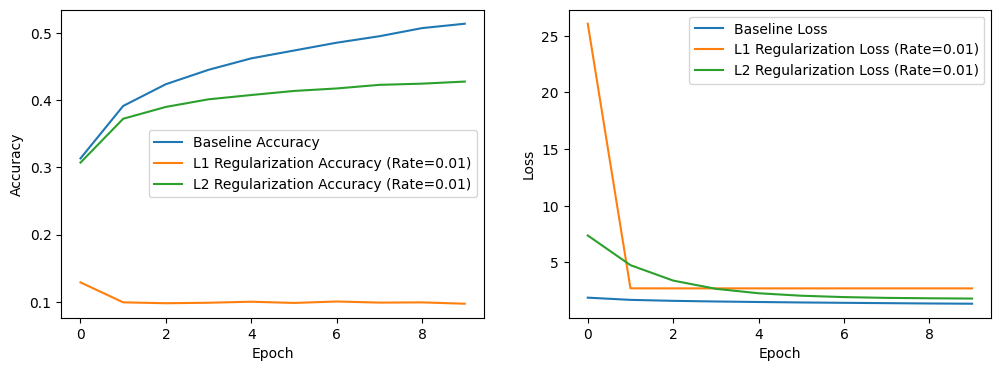

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset and preprocess the data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Define a function to create the baseline model
def create_baseline_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Define a function to create the model with L1 or L2 regularization
def create_regularized_model(regularizer):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(256, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(10, activation='softmax'))
    return model

# Create baseline model
baseline_model = create_baseline_model()
baseline_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the baseline model
baseline_history = baseline_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)

# Function to create and train a model with L1 or L2 regularization
def train_regularized_model(regularizer):
    model = create_regularized_model(regularizer)
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)
    return history

# L1 regularization (you can adjust the regularization rate)
l1_regularizer = l1(0.01)
l1_history = train_regularized_model(regularizer=l1_regularizer)

# L2 regularization (you can adjust the regularization rate)
l2_regularizer = l2(0.01)
l2_history = train_regularized_model(regularizer=l2_regularizer)

# Plot training history for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['accuracy'], label='Baseline Accuracy')
plt.plot(l1_history.history['accuracy'], label=f'L1 Regularization Accuracy (Rate={0.01})')
plt.plot(l2_history.history['accuracy'], label=f'L2 Regularization Accuracy (Rate={0.01})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['loss'], label='Baseline Loss')
plt.plot(l1_history.history['loss'], label=f'L1 Regularization Loss (Rate={0.01})')
plt.plot(l2_history.history['loss'], label=f'L2 Regularization Loss (Rate={0.01})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


11490434/11490434 [==============================] - 0s 0us/step


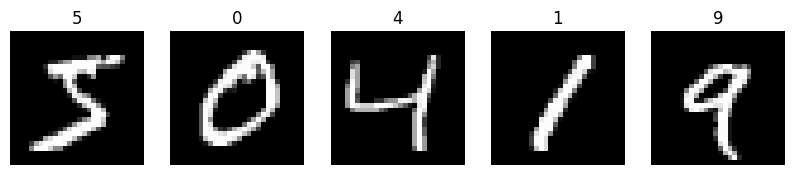

Image dimensions: (28, 28)
Number of classes: 10
Epoch 1/10
938/938 - 44s - loss: 0.1793 - accuracy: 0.9442 - val_loss: 0.0500 - val_accuracy: 0.9835 - 44s/epoch - 47ms/step
Epoch 2/10
938/938 - 42s - loss: 0.0503 - accuracy: 0.9836 - val_loss: 0.0395 - val_accuracy: 0.9864 - 42s/epoch - 45ms/step
Epoch 3/10
938/938 - 41s - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.0304 - val_accuracy: 0.9907 - 41s/epoch - 44ms/step
Epoch 4/10
938/938 - 44s - loss: 0.0271 - accuracy: 0.9918 - val_loss: 0.0330 - val_accuracy: 0.9891 - 44s/epoch - 47ms/step
Epoch 5/10
938/938 - 41s - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0305 - val_accuracy: 0.9903 - 41s/epoch - 44ms/step
Epoch 6/10
938/938 - 41s - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0277 - val_accuracy: 0.9923 - 41s/epoch - 44ms/step
Epoch 7/10
938/938 - 41s - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0354 - val_accuracy: 0.9906 - 41s/epoch - 44ms/step
Epoch 8/10
938/938 - 41s - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.038

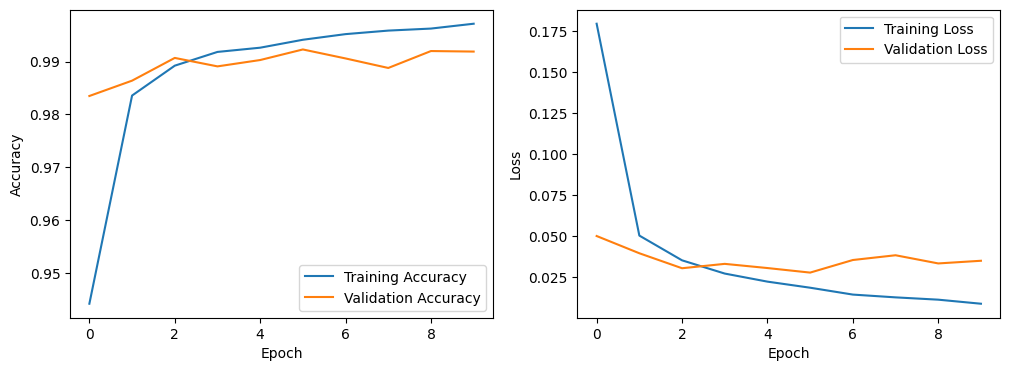

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# a. Load the MNIST dataset and display a few sample images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display a few sample images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(str(train_labels[i]))
    plt.axis('off')
plt.show()

# Discuss the dimensions of the images and the number of classes
print(f"Image dimensions: {train_images.shape[1:]}")
num_classes = len(set(train_labels))
print(f"Number of classes: {num_classes}")

# b. Preprocessing the MNIST dataset
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# c. Implement the architecture of a Convolutional Neural Network (CNN)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# d. Compile and train the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=2)

# Evaluate the trained CNN on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%\n")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/5
157/157 - 23s - loss: 0.6761 - accuracy: 0.5694 - val_loss: 0.6341 - val_accuracy: 0.6554 - 23s/epoch - 149ms/step
Epoch 2/5
157/157 - 22s - loss: 0.4727 - accuracy: 0.7825 - val_loss: 0.4276 - val_accuracy: 0.8174 - 22s/epoch - 138ms/step
Epoch 3/5
157/157 - 21s - loss: 0.2811 - accuracy: 0.8879 - val_loss: 0.4455 - val_accuracy: 0.8016 - 21s/epoch - 131ms/step
Epoch 4/5
157/157 - 22s - loss: 0.1403 - accuracy: 0.9565 - val_loss: 0.4384 - val_accuracy: 0.8258 - 22s/epoch - 138ms/step
Epoch 5/5
157/157 - 22s - loss: 0.1020 - accuracy: 0.9666 - val_loss: 0.4812 - val_accuracy: 0.8148 - 22s/epoch - 138ms/step
782/782 - 16s - loss: 0.4978 - accuracy: 0.8105 - 16s/epoch - 20ms/step

Test Accuracy: 81.05%



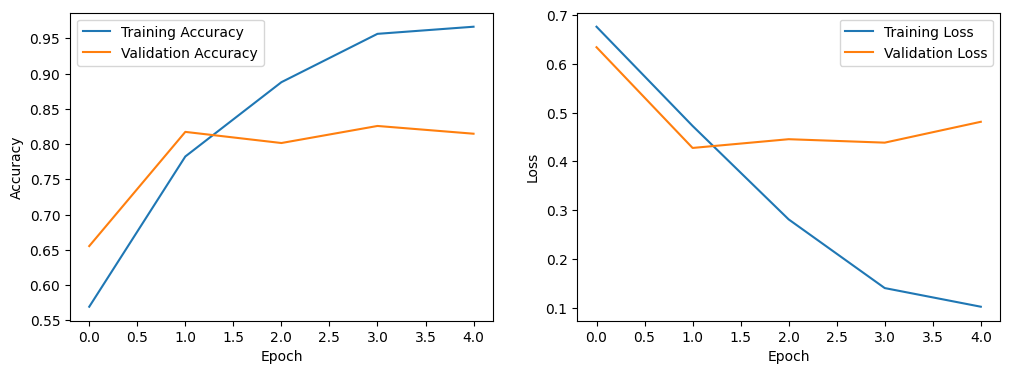

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# a. Load the IMDB dataset
max_features = 10000  # Limit the number of words
max_len = 500  # Set maximum sequence length for reviews

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
train_data = sequence.pad_sequences(train_data, maxlen=max_len)
test_data = sequence.pad_sequences(test_data, maxlen=max_len)

# b. Preprocess the data
# The reviews are already encoded as sequences of integers, and we pad them to have the same length.
# The embedding layer will be used to learn word embeddings.
# The SimpleRNN layer will process the sequences.
# The Dense layer with a sigmoid activation function will perform binary classification.

# c. Build the RNN model
model = Sequential()
model.add(Embedding(max_features, 32))  # Embedding layer with 32-dimensional embeddings
model.add(SimpleRNN(32))  # SimpleRNN layer with 32 units
# model.add(LSTM(32))
# model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))  # Dense layer for binary classification

# d. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# e. Train the RNN model
history = model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_split=0.2, verbose=2)

# f. Evaluate the trained model on the testing dataset
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%\n")

# Additional: Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
